In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [4]:
'''
path_to_formulas = 'Data/Data_Bank/,
                  path_to_image_names= 'Data/Data_Bank/generated_png_images',


'''


data = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=200,#*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.95,
                
                load_vocabulary = False,
                 


                 batch_size = 64,
                num_workers = 10,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [12]:
data.df

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,\delta \psi _ { \mu a } = D _ { \mu } \epsilon...,c2ed08089e871e2.png,29,196,144,"[\delta, \psi, _, {, \mu, a, }, =, D, _, {, \m...",49
1,( \bot ^ { \mu } { _ { \lambda } } \widetilde ...,a13ba841841f98d.png,21,355,355,"[(, \bot, ^, {, \mu, }, {, _, {, \lambda, }, }...",112
2,\langle 0 | u \left( x _ { \perp } \right) | 0...,c5f18ec88e249a0.png,17,176,86,"[\langle, 0, |, u, \left(, x, _, {, \perp, }, ...",26
3,W _ { I J K } = \partial _ { I } \partial _ { ...,6b864bc769815e4.png,17,127,83,"[W, _, {, I, J, K, }, =, \partial, _, {, I, },...",30
4,\mathrm { d e t } \left( \tilde { f } ( M ) \r...,33a558cdeb40f37.png,46,198,159,"[\mathrm, {, d, e, t, }, \left(, \tilde, {, f,...",56
...,...,...,...,...,...,...,...
214,{ \cal C } _ { a b } = - 2 G _ { B a b } g _ {...,6b49df57aaf3465.png,18,166,98,"[{, \cal, C, }, _, {, a, b, }, =, -, 2, G, _, ...",42
215,u _ { a _ { k } } ^ { * } = { \cal P } _ { a _...,a4b9663d344d09b.png,17,147,80,"[u, _, {, a, _, {, k, }, }, ^, {, *, }, =, {, ...",36
216,2 ( G - B G ^ { - 1 } B ) w = - B G ^ { - 1 } ...,814f6c86ae30422.png,31,358,125,"[2, (, G, -, B, G, ^, {, -, 1, }, B, ), w, =, ...",54
217,"I _ { j , \alpha } ^ { ( a ) } = J _ { j , \al...",004b16fd8212584.png,31,218,152,"[I, _, {, j, ,, \alpha, }, ^, {, (, a, ), }, =...",67


In [13]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 563 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [14]:
# prepeares the dataloaders with transformations and splits train/val
data.setup()

Train/Val Data is ready for Model loading.


In [15]:
data.inverse_vocabulary

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: '!',
 4: '"',
 5: '&',
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '--',
 13: '---',
 14: '.',
 15: '/',
 16: '0',
 17: '0.14',
 18: '0.4',
 19: '0.5',
 20: '0.7',
 21: '1',
 22: '10',
 23: '2',
 24: '3',
 25: '4',
 26: '5',
 27: '6',
 28: '7',
 29: '8',
 30: '8.5',
 31: '9',
 32: ':',
 33: ';',
 34: '<',
 35: '=',
 36: '>',
 37: '?',
 38: '@',
 39: 'A',
 40: 'B',
 41: 'C',
 42: 'D',
 43: 'E',
 44: 'F',
 45: 'G',
 46: 'H',
 47: 'I',
 48: 'J',
 49: 'K',
 50: 'L',
 51: 'M',
 52: 'N',
 53: 'O',
 54: 'P',
 55: 'Q',
 56: 'R',
 57: 'S',
 58: 'T',
 59: 'U',
 60: 'V',
 61: 'W',
 62: 'X',
 63: 'Y',
 64: 'Z',
 65: '[',
 66: '\\',
 67: '\\!',
 68: '\\#',
 69: '\\&',
 70: '\\,',
 71: '\\:',
 72: '\\;',
 73: '\\Big',
 74: '\\Bigg',
 75: '\\Biggl',
 76: '\\Biggm',
 77: '\\Biggr',
 78: '\\Bigl',
 79: '\\Bigm',
 80: '\\Bigr',
 81: '\\Box',
 82: '\\Gamma',
 83: '\\Huge',
 84: '\\Im',
 85: '\\Join',
 86: '\\LARGE',
 87: '\\Lambda',
 88: '\\Large',
 8

# Checking the data 


In [16]:
data.df['image_name'][10]

'6fa99327b7dcec7.png'

Image is below


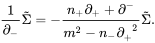

Label:


<IPython.core.display.Math object>

Tex formula: 

\frac { 1 } { { \partial } _ { - } } \tilde { \Sigma } = - \frac { n _ { + } { \partial } _ { + } + { \partial } ^ { - } } { m ^ { 2 } - n _ { - } { \partial } _ { + } ^ { \; \; 2 } } \tilde { \Sigma } .


In [17]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

### Check  vocabulary 

In [18]:
print(data.vocabulary)

{'<S>': 0, '<E>': 1, '<P>': 2, '!': 3, '"': 4, '&': 5, '(': 6, ')': 7, '*': 8, '+': 9, ',': 10, '-': 11, '--': 12, '---': 13, '.': 14, '/': 15, '0': 16, '0.14': 17, '0.4': 18, '0.5': 19, '0.7': 20, '1': 21, '10': 22, '2': 23, '3': 24, '4': 25, '5': 26, '6': 27, '7': 28, '8': 29, '8.5': 30, '9': 31, ':': 32, ';': 33, '<': 34, '=': 35, '>': 36, '?': 37, '@': 38, 'A': 39, 'B': 40, 'C': 41, 'D': 42, 'E': 43, 'F': 44, 'G': 45, 'H': 46, 'I': 47, 'J': 48, 'K': 49, 'L': 50, 'M': 51, 'N': 52, 'O': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58, 'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64, '[': 65, '\\': 66, '\\!': 67, '\\#': 68, '\\&': 69, '\\,': 70, '\\:': 71, '\\;': 72, '\\Big': 73, '\\Bigg': 74, '\\Biggl': 75, '\\Biggm': 76, '\\Biggr': 77, '\\Bigl': 78, '\\Bigm': 79, '\\Bigr': 80, '\\Box': 81, '\\Gamma': 82, '\\Huge': 83, '\\Im': 84, '\\Join': 85, '\\LARGE': 86, '\\Lambda': 87, '\\Large': 88, '\\Leftrightarrow': 89, '\\Longleftarrow': 90, '\\Longleftrightarrow': 91, '\\Longrightarr

In [19]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

,token,id,freq
561,},561,1968947
559,{,559,1968947
527,_,527,651744
526,^,526,550195
23,2,23,331140
...,...,...,...
309,\lor,309,1
288,\left\lmoustache,288,1
1,<E>,1,0
2,<P>,2,0


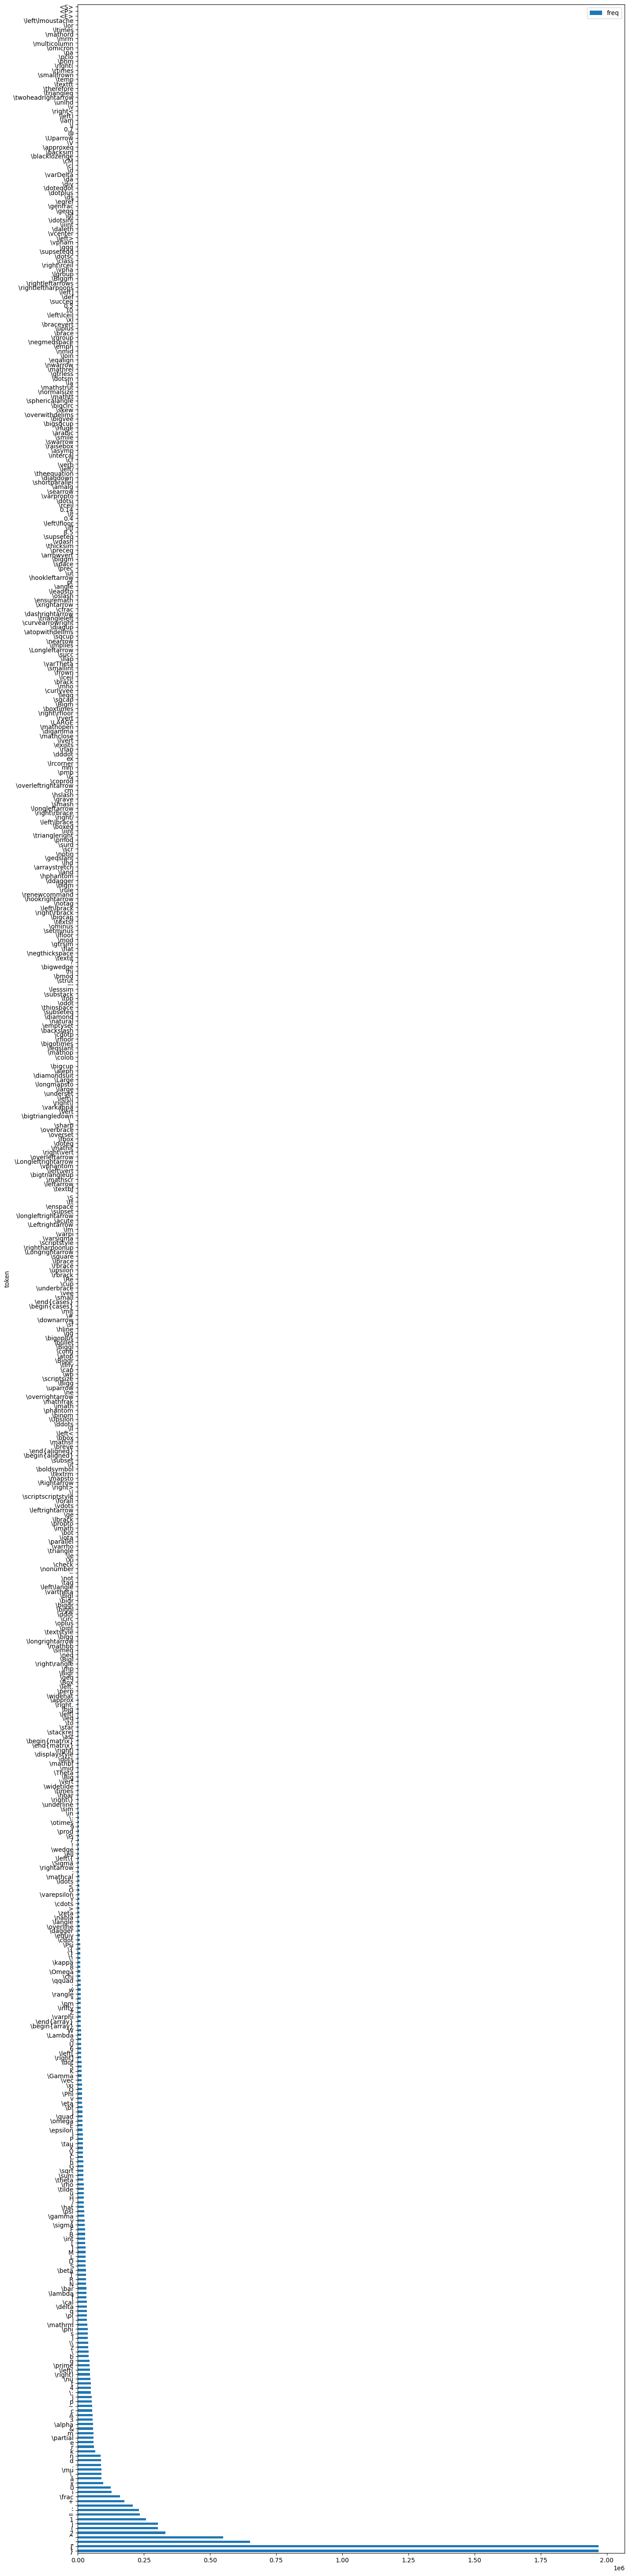

In [20]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [21]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

38     7
40     6
36     6
26     5
32     5
      ..
65     1
91     1
22     1
114    1
19     1
Name: tokenized_len, Length: 89, dtype: int64

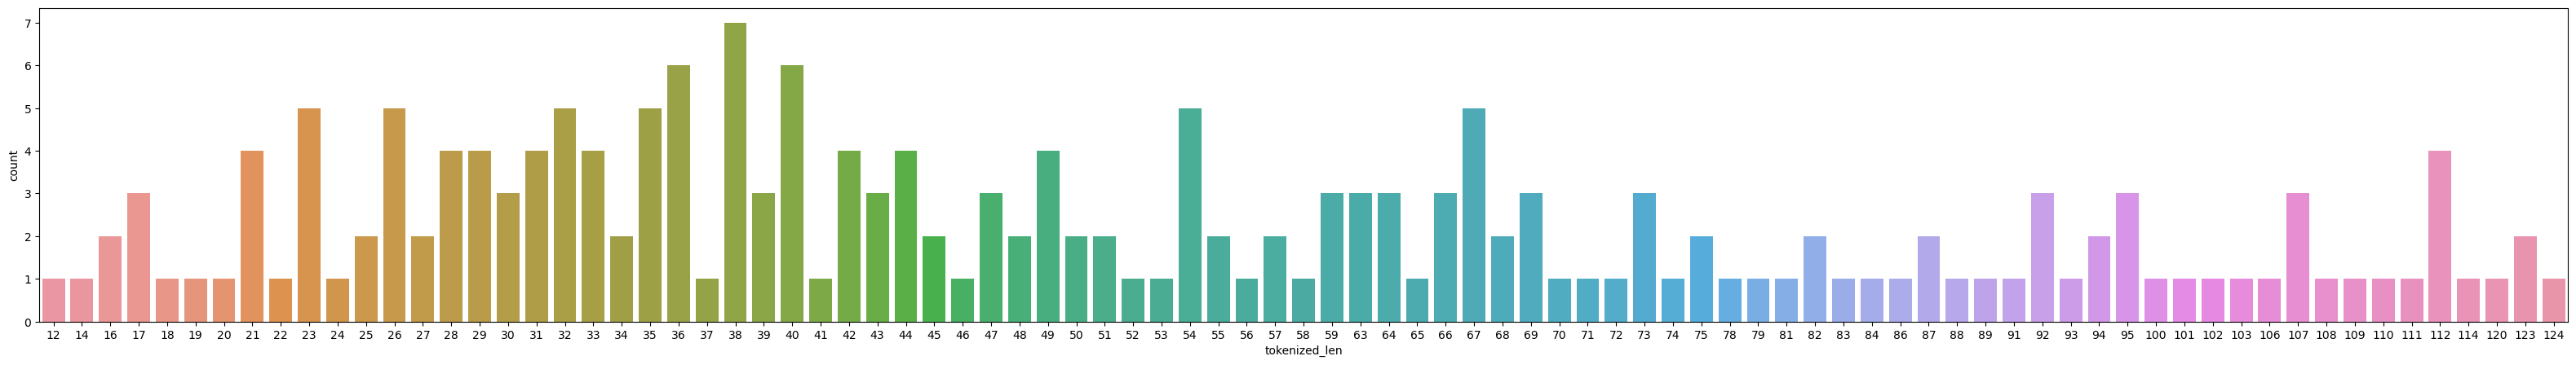

In [22]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

## Acessing the data

In [23]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


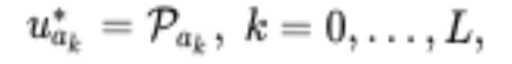

<S>u_{a_{k}}^{*}={\calP}_{a_{k}},\;k=0,\ldots,L,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [24]:
transform = transforms.ToPILImage()
display(transform(data.data_train[1][0]))
print(token_to_strings(data.data_train[1][1]))